# IDA Credits EDA #

Here we will assess the suitablity of the IRA Credits dataset for a classification task. My initial idea was that we could use the dataset to try and predict the credit status of each different credit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
csv_link = "https://drive.google.com/uc?id=1nqO4kDmA04Lq3aovME1EyhU_L_EzmiWF"

In [38]:
data1 = pd.read_csv(csv_link)

In [2]:
data = pd.read_csv('IDA_Credits_20240926.csv')
data.head(3)

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,08/31/2024 12:00:00 AM,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0.0,0,0.0,09/01/1971 12:00:00 AM,03/01/2011 12:00:00 AM,05/12/1961 12:00:00 AM,05/11/1961 12:00:00 AM,06/29/1961 12:00:00 AM,07/31/1967 12:00:00 AM,NaN
1,08/31/2024 12:00:00 AM,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0.0,0,0.0,07/15/1971 12:00:00 AM,01/15/2011 12:00:00 AM,06/14/1961 12:00:00 AM,06/13/1961 12:00:00 AM,10/19/1961 12:00:00 AM,12/31/1971 12:00:00 AM,NaN
2,08/31/2024 12:00:00 AM,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0.0,0,0.0,08/15/1971 12:00:00 AM,02/15/2011 12:00:00 AM,06/21/1961 12:00:00 AM,06/20/1961 12:00:00 AM,08/25/1961 12:00:00 AM,06/30/1967 12:00:00 AM,NaN


In [3]:
# Print the shape of the dataframe
print(data.shape)

(8298, 30)


The data is made up of 8298 different credits with 30 different features

In [4]:
# Create and print a list of all possible credit status values
credit_status_values = data['Credit Status'].unique().tolist()
print(credit_status_values)

['Fully Repaid', 'Repaying', 'Fully Cancelled', 'Disbursing&Repaying', 'Terminated', 'Effective', 'Signed', 'Fully Disbursed', 'Disbursing', 'Approved']


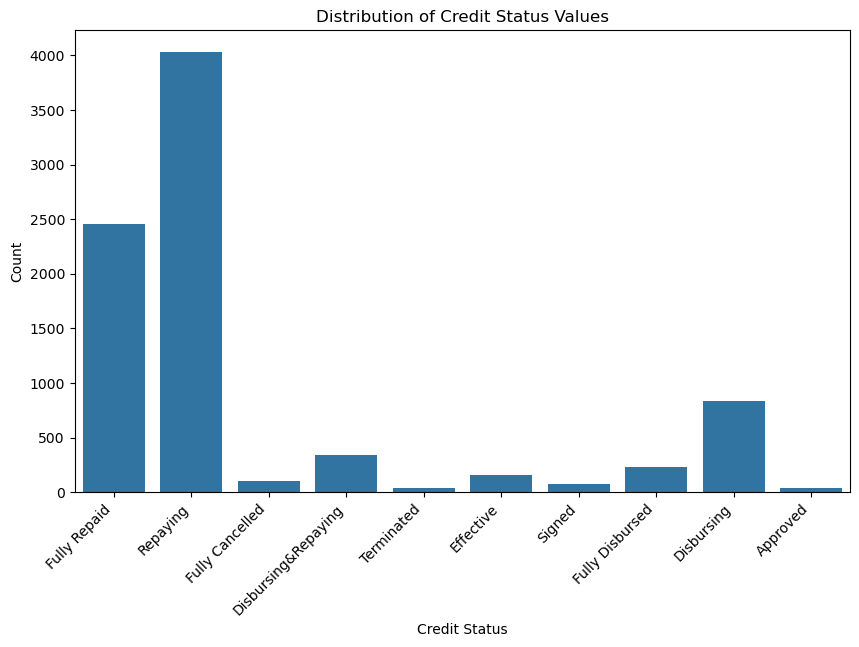

In [5]:
# Plot a histogram to show the distribution of the different credit status values
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Credit Status', order=credit_status_values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Credit Status Values')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

We see here that around half the credits are still being repayed and just over a quarter have been fully repaid

C:\Users\44747\AppData\Local\Temp\ipykernel_45984\527365970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


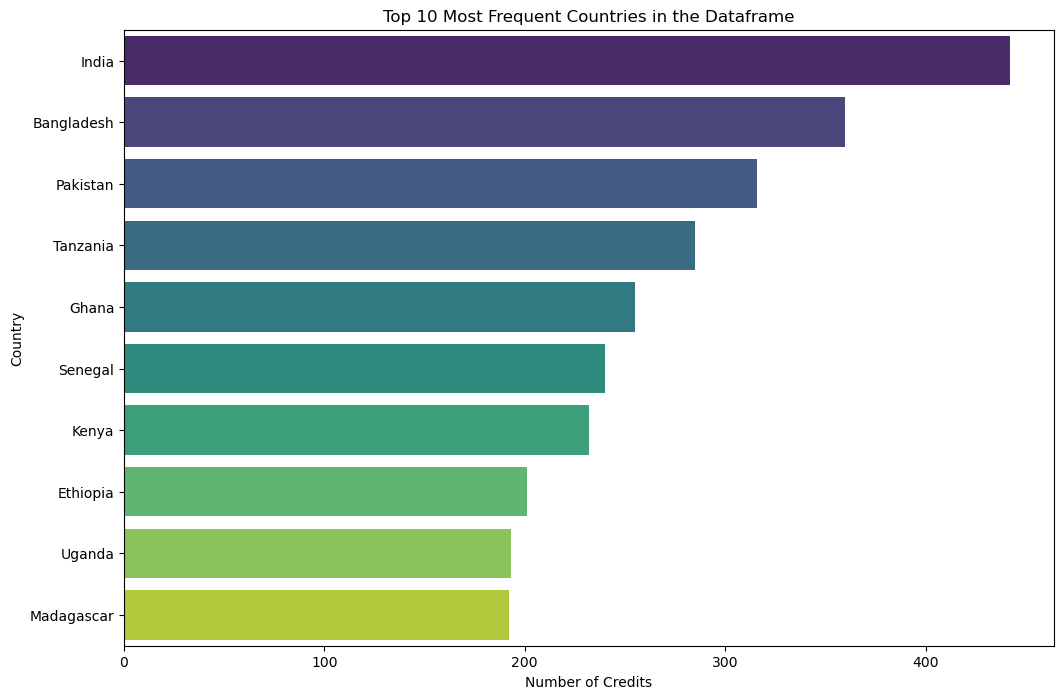

In [6]:
# Plot the top 10 most frequent countries in the dataframe
top_10_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Most Frequent Countries in the Dataframe')
plt.xlabel('Number of Credits')
plt.ylabel('Country')
plt.show()

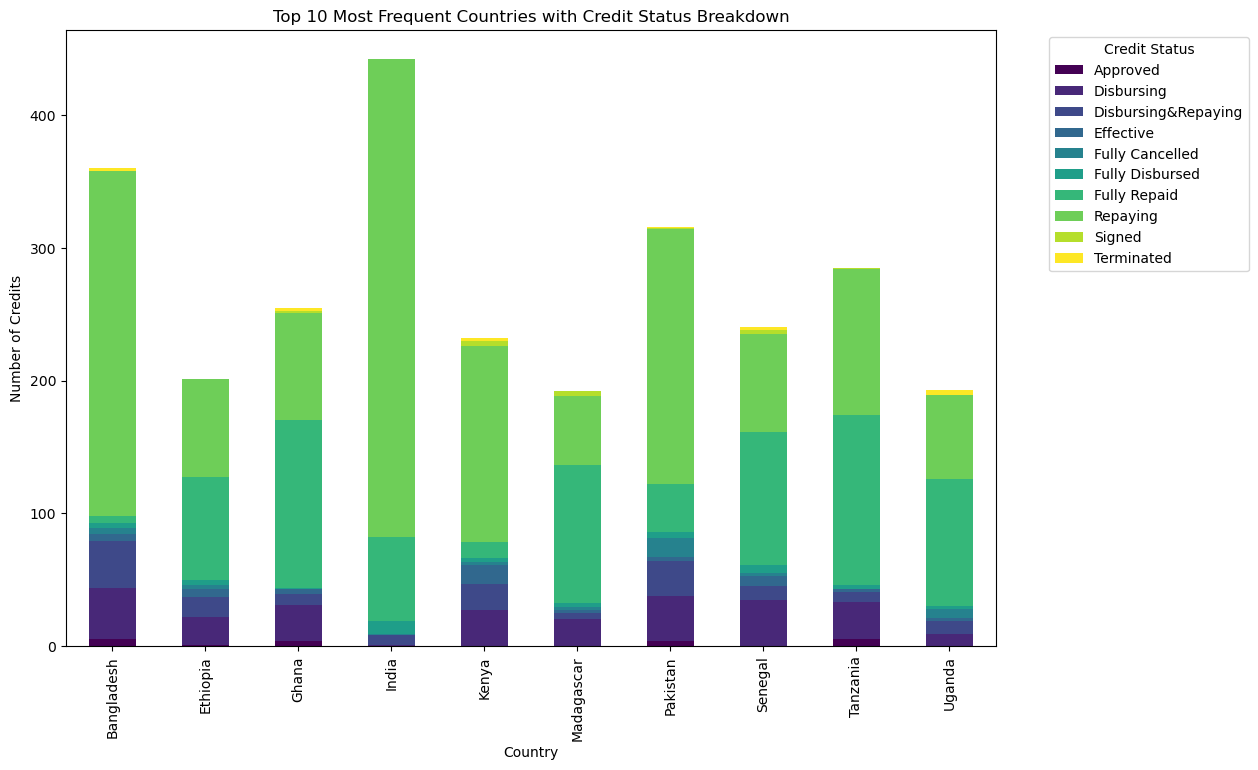

In [7]:
# Create a pivot table to count the occurrences of each credit status for the top 10 countries
top_10_countries_data = data[data['Country'].isin(top_10_countries.index)]
pivot_table_top_10 = top_10_countries_data.pivot_table(index='Country', columns='Credit Status', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
pivot_table_top_10.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Top 10 Most Frequent Countries with Credit Status Breakdown')
plt.xlabel('Country')
plt.ylabel('Number of Credits')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lets have a look at some of the continuous features

In [8]:
data.describe()

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Exchange Adjustment (US$),Borrower's Obligation (US$),Sold 3rd Party (US$),Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$)
count,8188.000000,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8298.0,8.298000e+03,8.298000e+03,8.298000e+03,8298.0,8.298000e+03
mean,0.928169,5.629984e+07,4.444738e+06,9.299796e+06,4.261844e+07,1.702216e+07,2.504809e+07,0.0,2.504809e+07,1.277615e+04,1.277615e+04,0.0,3.434788e+07
std,0.637007,8.708277e+07,2.171301e+07,4.192696e+07,6.965824e+07,3.115467e+07,5.894747e+07,0.0,5.894747e+07,3.090340e+05,3.090340e+05,0.0,7.469192e+07
min,0.000000,0.000000e+00,0.000000e+00,-1.000000e-02,0.000000e+00,0.000000e+00,-3.170000e+00,0.0,-3.170000e+00,0.000000e+00,0.000000e+00,0.0,-3.170000e+00
25%,0.750000,1.000000e+07,0.000000e+00,0.000000e+00,6.500000e+06,8.625728e+05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,0.750000,2.500000e+07,7.011890e+03,0.000000e+00,1.852653e+07,5.964340e+06,3.623503e+06,0.0,3.623503e+06,0.000000e+00,0.000000e+00,0.0,5.498464e+06
75%,0.750000,6.487500e+07,1.252049e+06,0.000000e+00,4.898607e+07,1.864771e+07,2.315364e+07,0.0,2.315364e+07,0.000000e+00,0.000000e+00,0.0,3.240796e+07
max,7.080000,1.200000e+09,1.200000e+09,7.610936e+08,1.010412e+09,5.617663e+08,1.047849e+09,0.0,1.047849e+09,1.750000e+07,1.750000e+07,0.0,1.048785e+09


We can see there are two columns that contain only zeros, so these would not be useful for any classification task

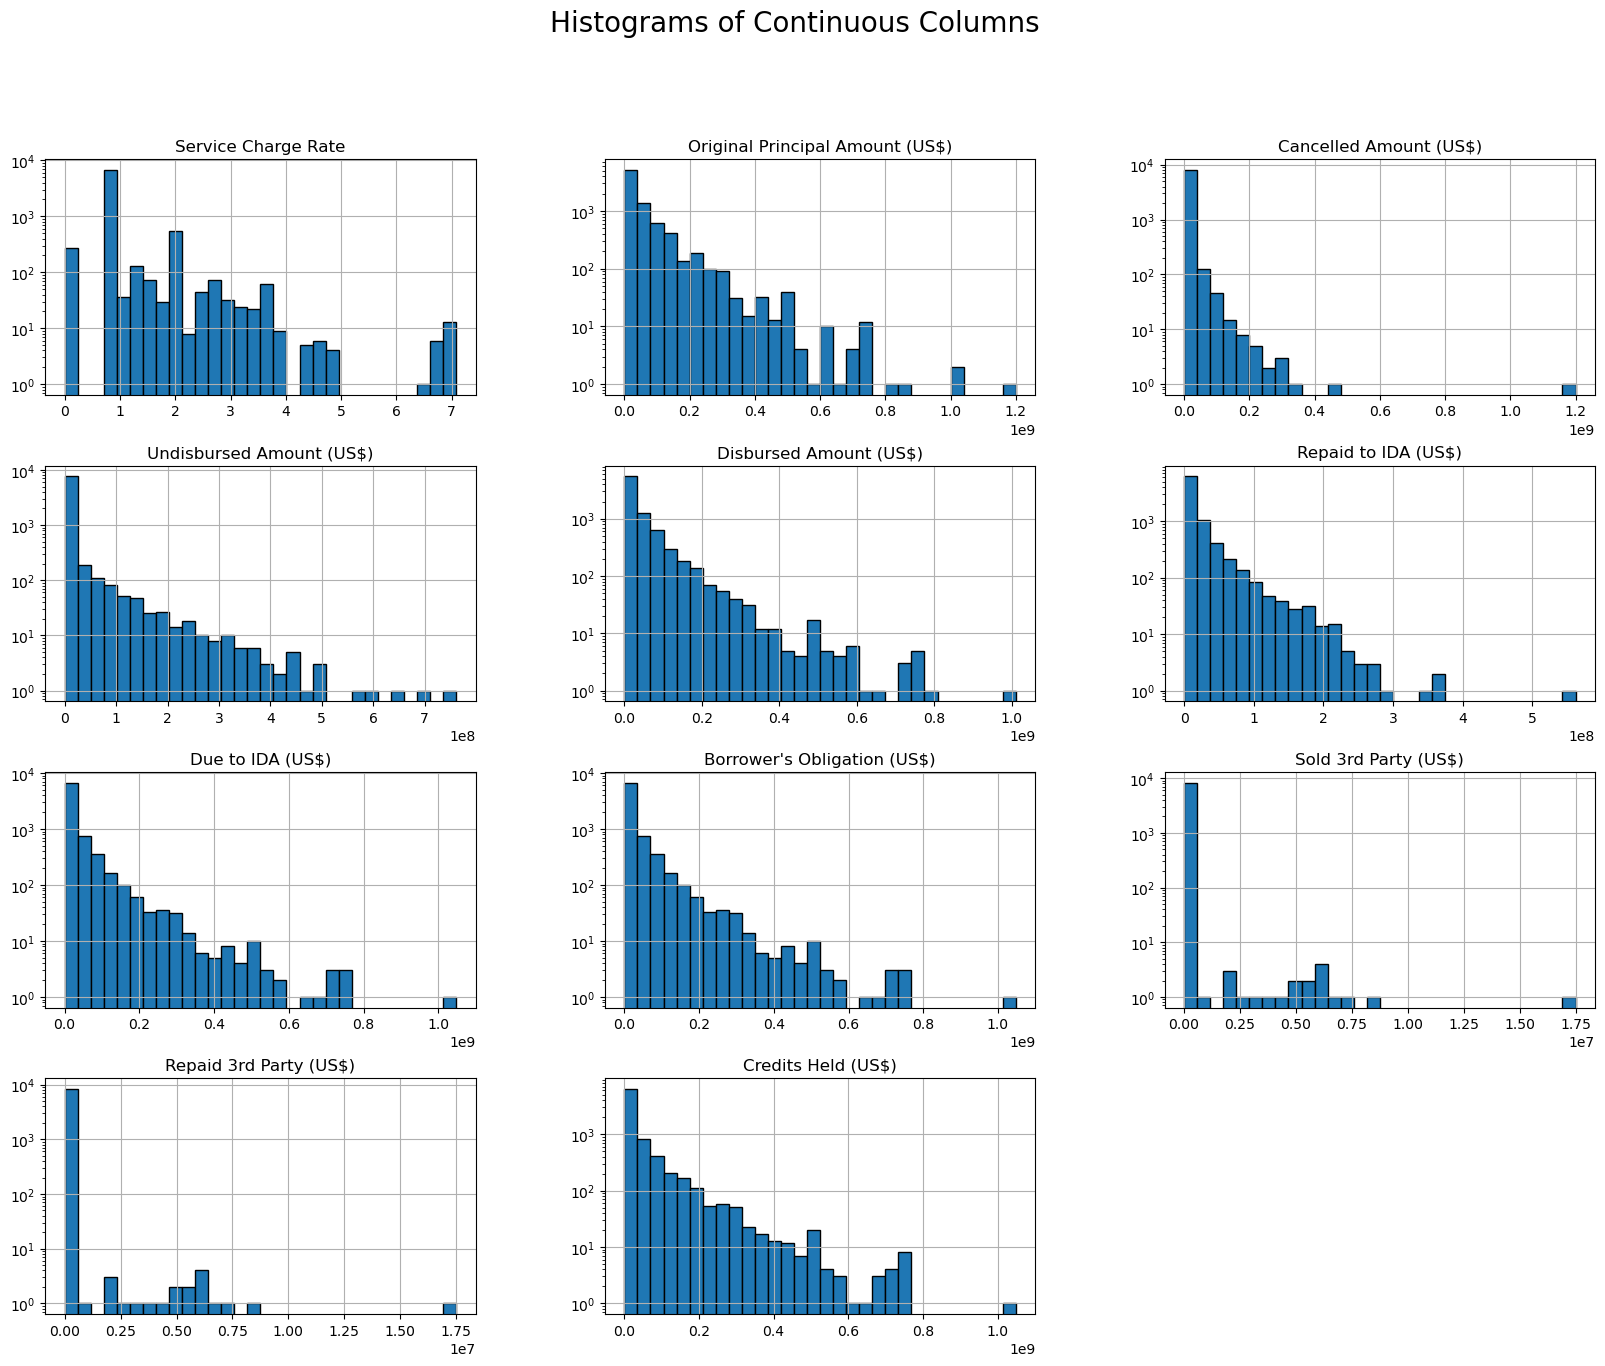

In [9]:
# Plot histograms for all continuous columns excluding 'Exchange Adjustment (US$)' and 'Due 3rd Party (US$)'
continuous_columns = data.select_dtypes(include=[np.number]).columns.tolist()
columns_to_exclude = ['Exchange Adjustment (US$)', 'Due 3rd Party (US$)']
continuous_columns = [col for col in continuous_columns if col not in columns_to_exclude]

data[continuous_columns].hist(figsize=(20, 15), bins=30, edgecolor='black', log=True)
plt.suptitle('Histograms of Continuous Columns', fontsize=20)
plt.show()

A lot of the data appears to have a very similar distribution, this is a slight concern already as there could be very high correlation between features depending on the credit status.

We will check the correlation between these features now

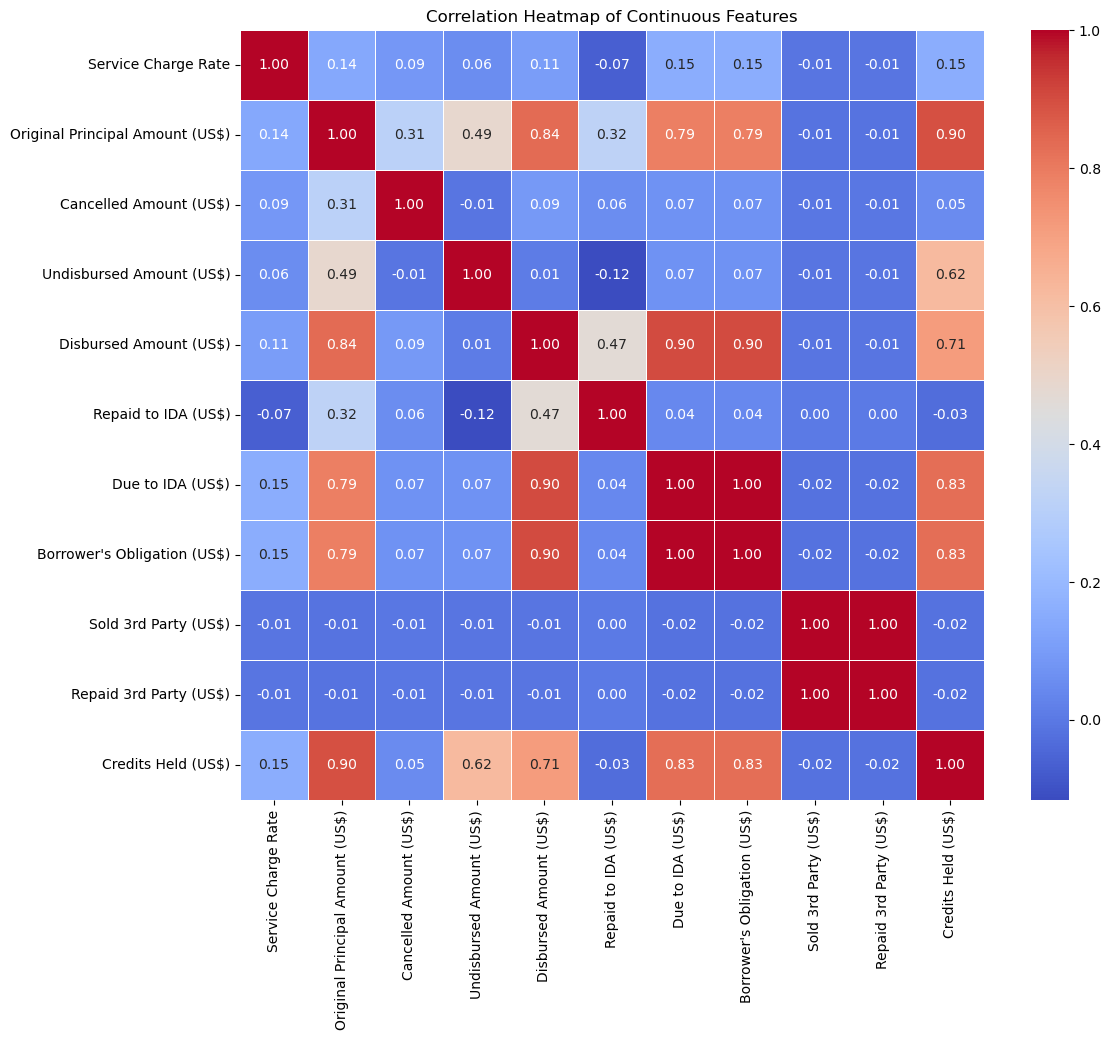

In [10]:

# Calculate the correlation matrix
correlation_matrix = data[continuous_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

We see that there are correlations but mainly ones that we would expect / are failry obvious assumptions such as a lot of the features having positive correlation to the Original Principle Amount as this impacts the scale of all the features.

We will now take a look at the mean of each feature relative to the credit status

In [11]:
continuous_columns

['Service Charge Rate',
 'Original Principal Amount (US$)',
 'Cancelled Amount (US$)',
 'Undisbursed Amount (US$)',
 'Disbursed Amount (US$)',
 'Repaid to IDA (US$)',
 'Due to IDA (US$)',
 "Borrower's Obligation (US$)",
 'Sold 3rd Party (US$)',
 'Repaid 3rd Party (US$)',
 'Credits Held (US$)']

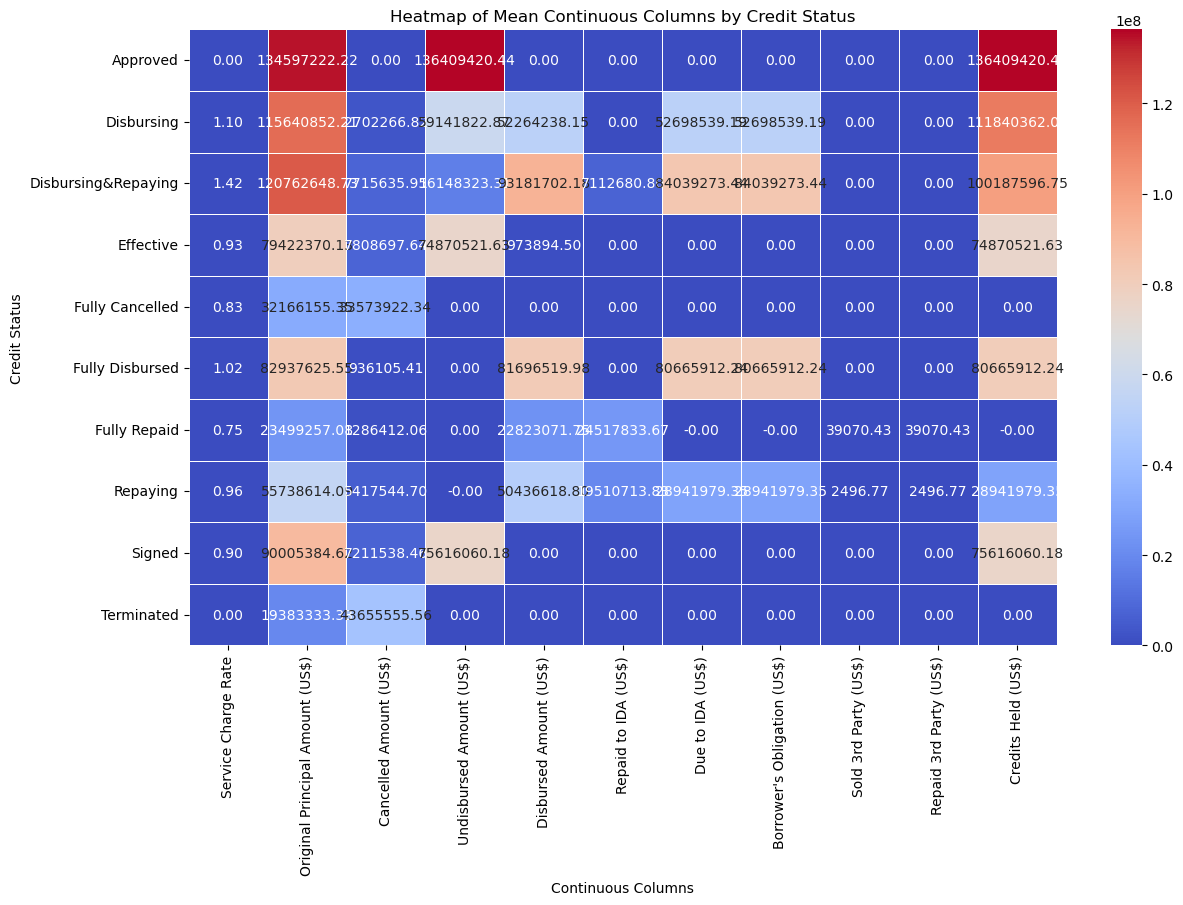

In [12]:
# Calculate the mean of continuous columns grouped by credit status
mean_by_credit_status = data.groupby('Credit Status')[continuous_columns].mean()

# Create a heatmap of the mean of continuous columns against the credit status
plt.figure(figsize=(14, 8))
sns.heatmap(mean_by_credit_status, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Mean Continuous Columns by Credit Status')
plt.xlabel('Continuous Columns')
plt.ylabel('Credit Status')
plt.show()

This is the greatest concern I have of this dataset, in each credit status there are two many features that have a 0 value for a few of the features. This is a problem as I think it is too deterministic as the value of the features are not independent of the credit status, e.g. if a credit is fully repaid we know that Due to IDA will be 0.

Lets have a look at the heatmap with it standardised

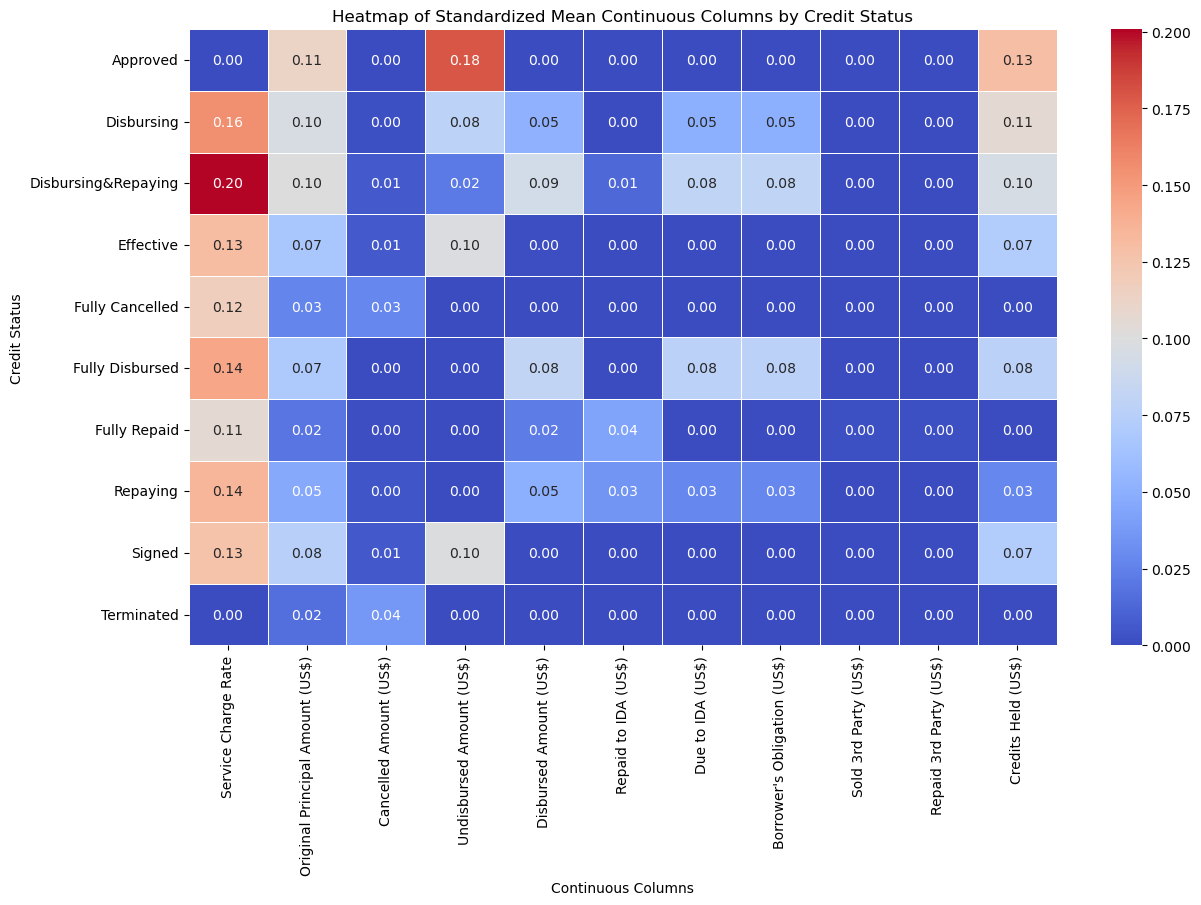

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Standardize the continuous columns between 0 and 1
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data[continuous_columns])

# Create a new DataFrame with the standardized data
standardized_df = pd.DataFrame(standardized_data, columns=continuous_columns)

# Calculate the mean of standardized continuous columns grouped by credit status
standardized_mean_by_credit_status = data[['Credit Status']].join(standardized_df).groupby('Credit Status').mean()

# Create a heatmap of the standardized mean of continuous columns against the credit status
plt.figure(figsize=(14, 8))
sns.heatmap(standardized_mean_by_credit_status, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Standardized Mean Continuous Columns by Credit Status')
plt.xlabel('Continuous Columns')
plt.ylabel('Credit Status')
plt.show()

Lots of dark blue and lots of 0s the dataset is looking increasingly uninteresting

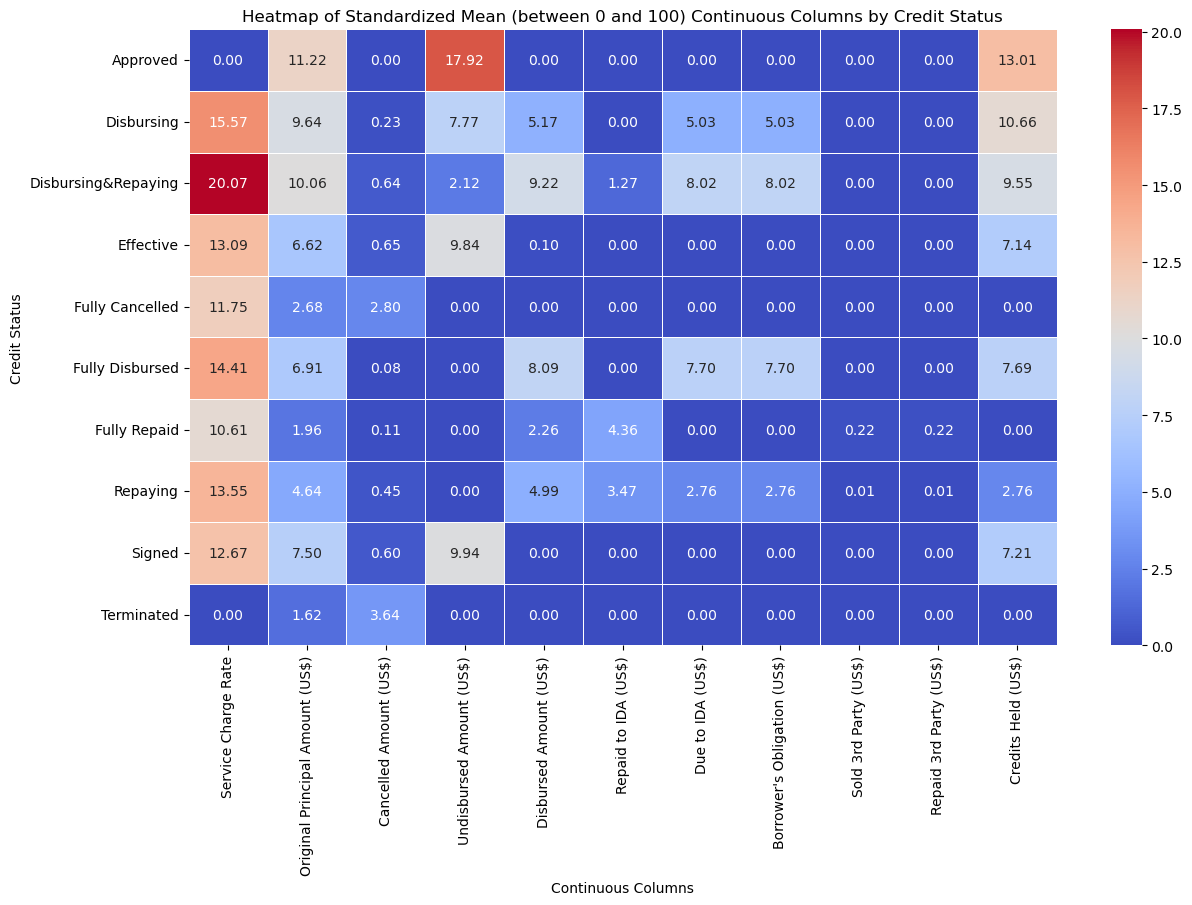

In [14]:
standardized_mean_by_credit_status = 100*standardized_mean_by_credit_status

# Create a heatmap of the standardized variance of continuous columns against the credit status
plt.figure(figsize=(14, 8))
sns.heatmap(standardized_mean_by_credit_status, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Standardized Mean (between 0 and 100) Continuous Columns by Credit Status')
plt.xlabel('Continuous Columns')
plt.ylabel('Credit Status')
plt.show()

The lack of variance in features between the different classes makes it seem like it would be difficult to use any of this data in a classification task.

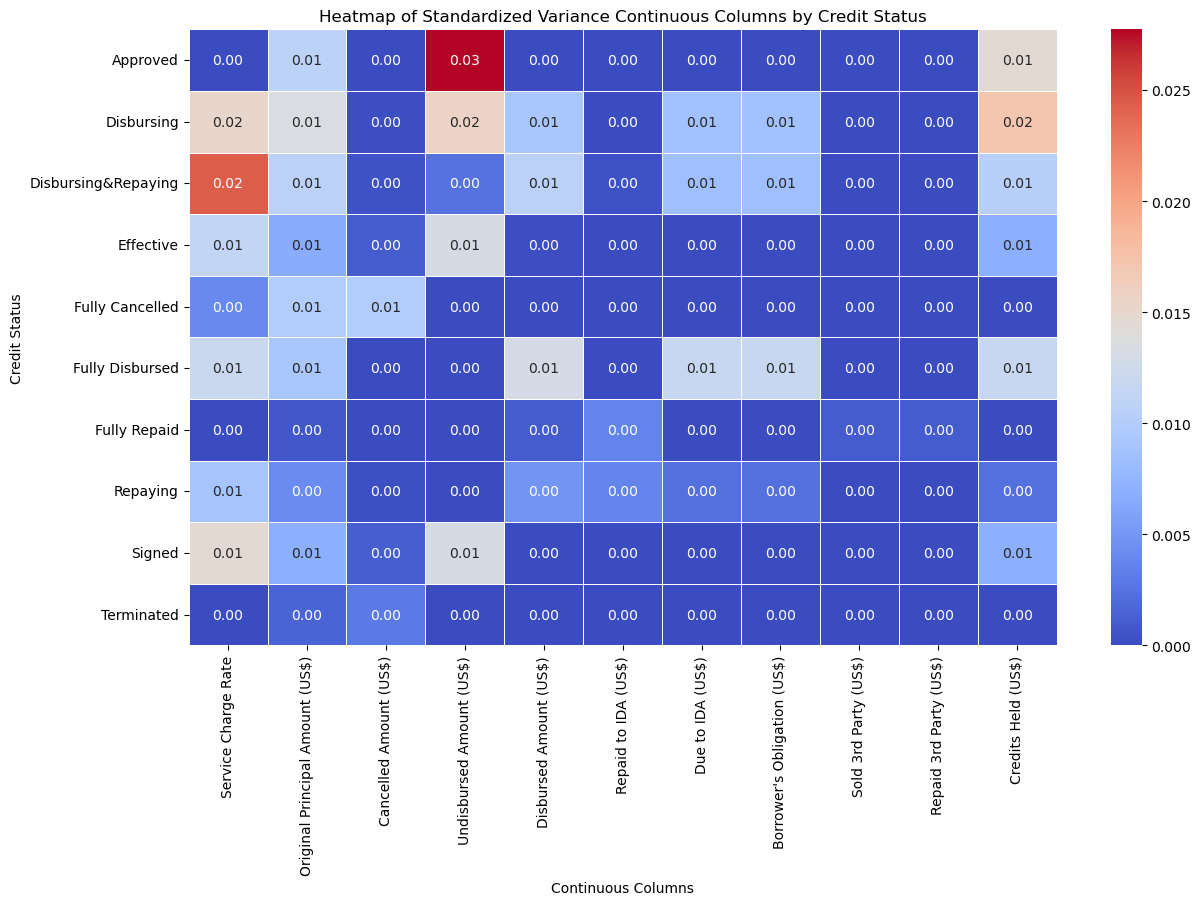

In [19]:
# Calculate the variance of standardized continuous columns grouped by credit status
standardized_variance_by_credit_status = data[['Credit Status']].join(standardized_df).groupby('Credit Status').var()

# Create a heatmap of the standardized variance of continuous columns against the credit status
plt.figure(figsize=(14, 8))
sns.heatmap(standardized_variance_by_credit_status, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Standardized Variance Continuous Columns by Credit Status')
plt.xlabel('Continuous Columns')
plt.ylabel('Credit Status')
plt.show()

Again not very interesting...the low variance makes it seem like it would probably be fairly easy to look at the features and determine what class it should be in, don't think there is a need to make a model

## We will now look at some of the discrete features ##

In [15]:
# Create a list of all discrete features
discrete_columns = data.select_dtypes(include=['object']).columns.tolist()
print(discrete_columns)

['End of Period', 'Credit Number', 'Region', 'Country Code', 'Country', 'Borrower', 'Credit Status', 'Currency of Commitment', 'Project ID', 'Project Name', 'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)', 'Closed Date (Most Recent)', 'Last Disbursement Date']


In [16]:
date_columns = ['End of Period', 'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)', 'Closed Date (Most Recent)', 'Last Disbursement Date']

In [20]:
# Convert date columns to datetime and format to month and year
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').dt.to_period('M')

data.head()

C:\Users\44747\AppData\Local\Temp\ipykernel_52736\2304588220.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.to_period('M')
C:\Users\44747\AppData\Local\Temp\ipykernel_52736\2304588220.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.to_period('M')
C:\Users\44747\AppData\Local\Temp\ipykernel_52736\2304588220.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.to_period('M')
C:\Users\44747\AppData

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,2024-08,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0.0,0,0.0,1971-09,2011-03,1961-05,1961-05,1961-06,1967-07,NaT
1,2024-08,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0.0,0,0.0,1971-07,2011-01,1961-06,1961-06,1961-10,1971-12,NaT
2,2024-08,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0.0,0,0.0,1971-08,2011-02,1961-06,1961-06,1961-08,1967-06,NaT
3,2024-08,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,P006585,...,0.0,0,0.0,1971-12,2011-06,1961-06,1961-06,1961-12,1968-12,NaT
4,2024-08,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P006701,...,0.0,0,0.0,1971-12,2011-06,1961-08,1961-08,1961-11,1968-12,NaT


In [17]:
# Convert date columns to datetime and format to month and year
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').dt.year

data.head()

C:\Users\44747\AppData\Local\Temp\ipykernel_45984\4284516904.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_45984\4284516904.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_45984\4284516904.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_45984\42

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,2024,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0.0,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1967.0,NaN
1,2024,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0.0,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1971.0,NaN
2,2024,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0.0,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1967.0,NaN
3,2024,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,P006585,...,0.0,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1968.0,NaN
4,2024,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P006701,...,0.0,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1968.0,NaN


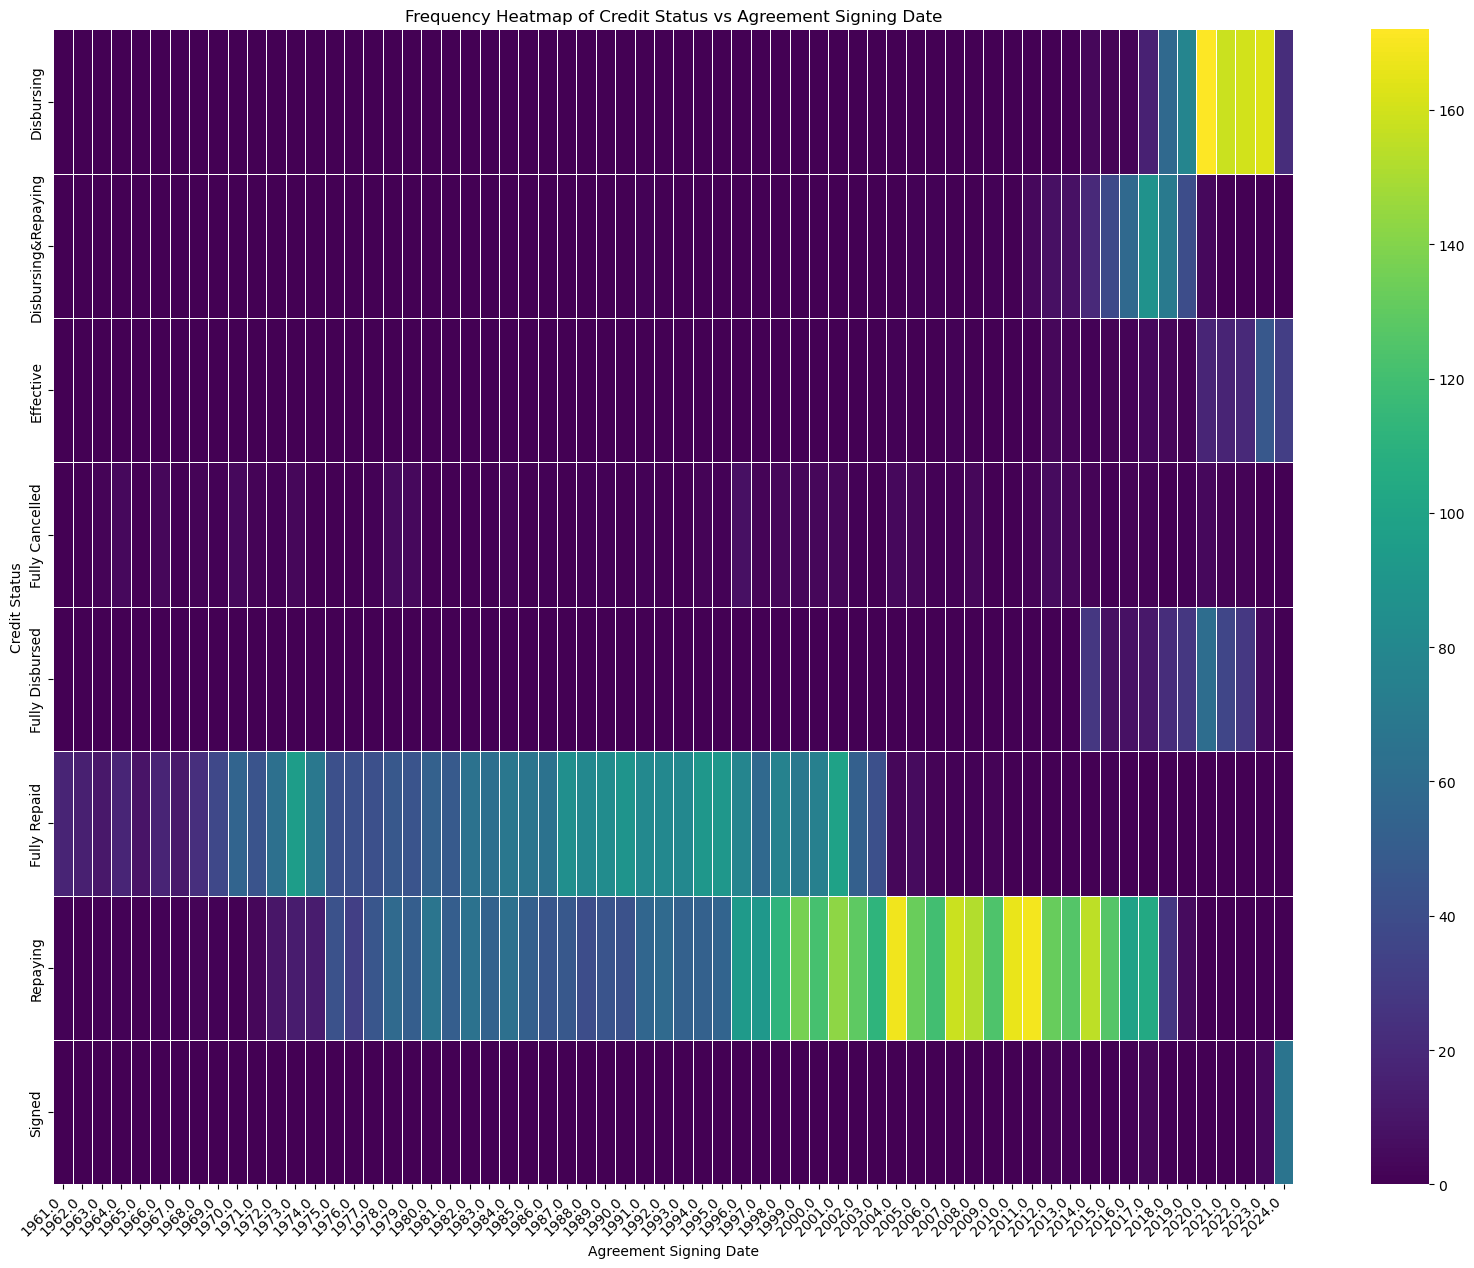

In [23]:
# Create a pivot table to count the occurrences of each credit status for 'Last Disbursement Date'
pivot_table_last_disbursement = data.pivot_table(index='Credit Status', columns='Agreement Signing Date', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table_last_disbursement, annot=False, fmt='d', cmap='viridis', linewidths=0.5)
plt.title('Frequency Heatmap of Credit Status vs Agreement Signing Date')
plt.xlabel('Agreement Signing Date')
plt.ylabel('Credit Status')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that the Agreement Signing date would give us a good indication of the credit status, clearly anything before 2014 is likely to be fully repaid or still repaying, the main classification challenge could possibly be determining whether it is fully repayed or still being repayed.

A better use of this dataset could be to try and predict how long it will take to repay the credits as we can see extremly few get cancelled.

In [24]:
# Create a column "Time taken to repay" and calculate the difference between 'Last Repayment Date' and 'First Repayment Date' for fully repaid credits
data['Time taken to repay'] = np.where(data['Credit Status'] == 'Fully Repaid', 
                                       data['Last Repayment Date'] - data['First Repayment Date'], 
                                       np.nan)

data.head()

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date,Time taken to repay
0,2024,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1967.0,NaN,40.0
1,2024,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1971.0,NaN,NaN
2,2024,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1967.0,NaN,40.0
3,2024,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,P006585,...,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1968.0,NaN,40.0
4,2024,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P006701,...,0,0.0,1971.0,2011.0,1961.0,1961,1961.0,1968.0,NaN,40.0


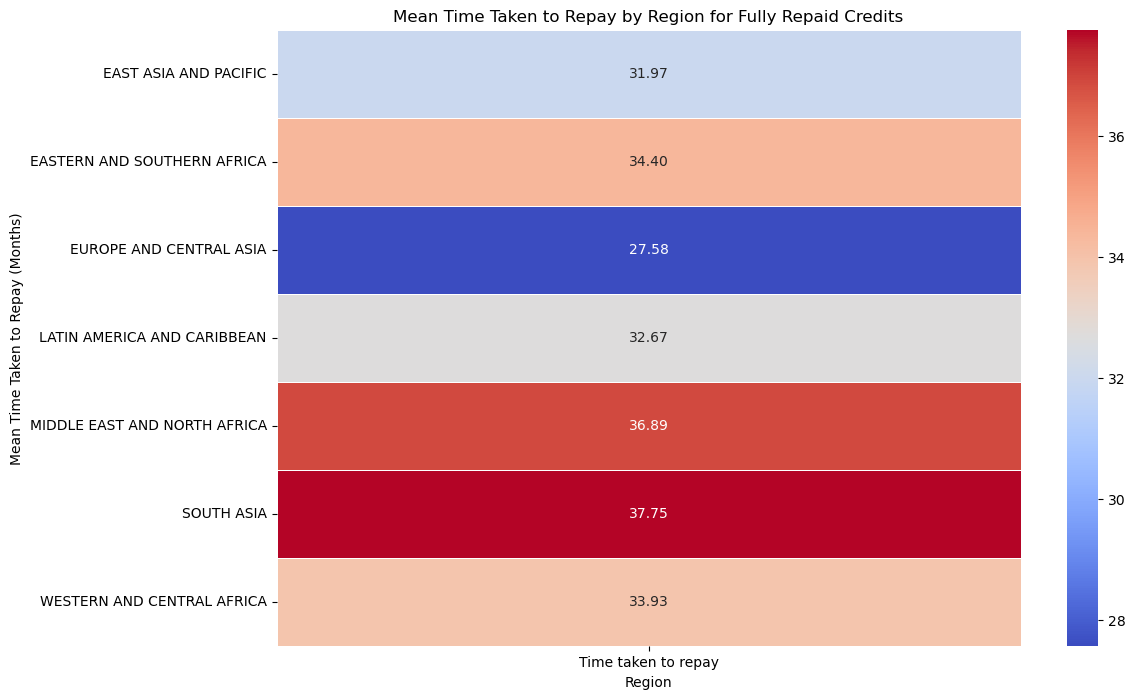

In [26]:
# Filter data for fully repaid credits
fully_repaid_data = data[data['Credit Status'] == 'Fully Repaid']

# Create a pivot table to calculate the mean time taken to repay for each region
pivot_table_repay_time_region = fully_repaid_data.pivot_table(index='Region', values='Time taken to repay', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_repay_time_region, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mean Time Taken to Repay by Region for Fully Repaid Credits')
plt.xlabel('Region')
plt.ylabel('Mean Time Taken to Repay (Months)')
plt.show()

In [28]:
fully_repaid_data['Time taken to repay'].describe()

count    2456.000000
mean       33.995521
std         5.980040
min         2.000000
25%        30.000000
50%        30.000000
75%        40.000000
max        47.000000
Name: Time taken to repay, dtype: float64

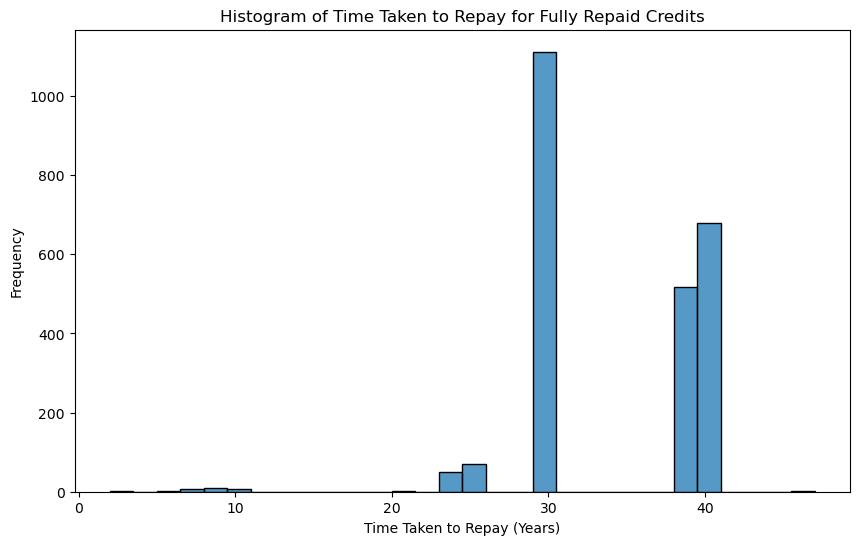

In [31]:
# Plot histogram of time taken to repay
plt.figure(figsize=(10, 6))
sns.histplot(data=fully_repaid_data, x='Time taken to repay', bins=30, kde=False)
plt.title('Histogram of Time Taken to Repay for Fully Repaid Credits')
plt.xlabel('Time Taken to Repay (Years)')
plt.ylabel('Frequency')
plt.show()

Again this doesn't seem to be too interesting it appears like most the credits are probably given a fixed time that they have to be repaid in, either 10/30/40years.

### Conclusion ###

I don't think this dataset is suitable for a classification task, we could try classifying into credit status but then the rest of the features either tell us nothing or practically tell us the credit status. A better idea might be to try and predict the amount of time it takes for the credit to be fully repaid. However, I believe the dataset would need to be combined with another to provide significant economic background on each country to allow us to try and make a good prediction without using any of the other date features which would make it a bit too easy. I don't think this is really feasible though as the repayment time is over potentially 40 years so we would need economic information for this country for the whole of this time. We could just get economic information for the country at the time the loan is given but even this would involve combining an extremely large number of datasets with us needing information for all the different countries for all the different years that credits are taken out. This doesn't even take into account that most the credits seem to be repaid on a fixed time period 10/30/40years, this is likely predetermined when the credit is given out so doesnt realy seem suitable to try and predict it